In [159]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

w = 2
k = 1

# E-Field

### Vector Field Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


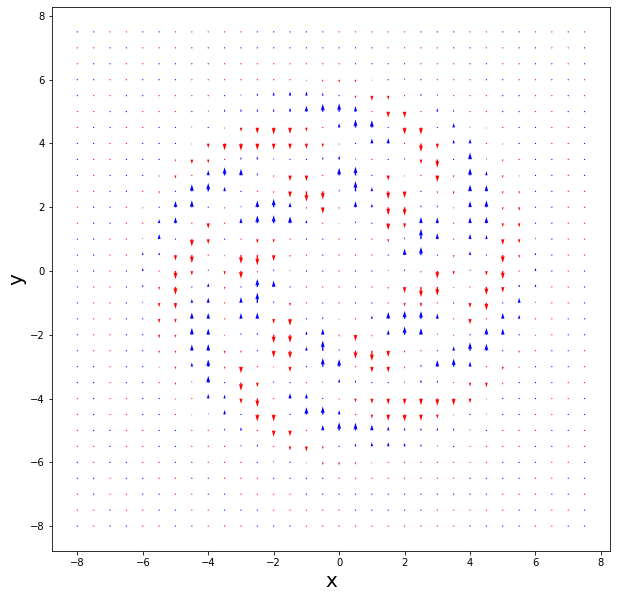

In [157]:
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, 0.5), np.arange(-8, 8, 0.5))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

z = 1

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating E-field
        E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))
        
        U[x,y] = 0
        V[x,y] = E

        C[x,y] = -1 if E > 0 else 1

plt.quiver(X, Y, U, V, C, units='xy', cmap='bwr', scale=5)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

In [197]:
%%capture
def update_quiver(i, Q, X, Y):
    z = i/10
    U = np.zeros(shape)
    V = np.zeros(shape)
    C = np.zeros(shape)

    for x in range(shape[0]):
        for y in range(shape[1]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
            theta = np.arctan2(Y[x,y],X[x,y])

            # Calculating E-field
            E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))

            U[x,y] = 0
            V[x,y] = E
            C[x,y] = -1 if E > 0 else 1
            
    Q.set_UVC(U, V, C)
    return Q,


X, Y = np.meshgrid(np.arange(-8, 8, 0.5), np.arange(-8, 8, 0.5))
shape = X.shape
U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

fig, ax = plt.subplots()
fig.set_size_inches(10,10, True)

Q = ax.quiver(X, Y, U, V, C, units='xy', cmap='bwr', scale=3)
Q = update_quiver(0, Q, X, Y)[0]

ax.set_xlim(( -8, 8))
ax.set_ylim(( -8, 8))

anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               frames=100, interval=100, 
                               blit=True)

In [198]:
HTML(anim.to_html5_video())

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


### 3d Cross Sections

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


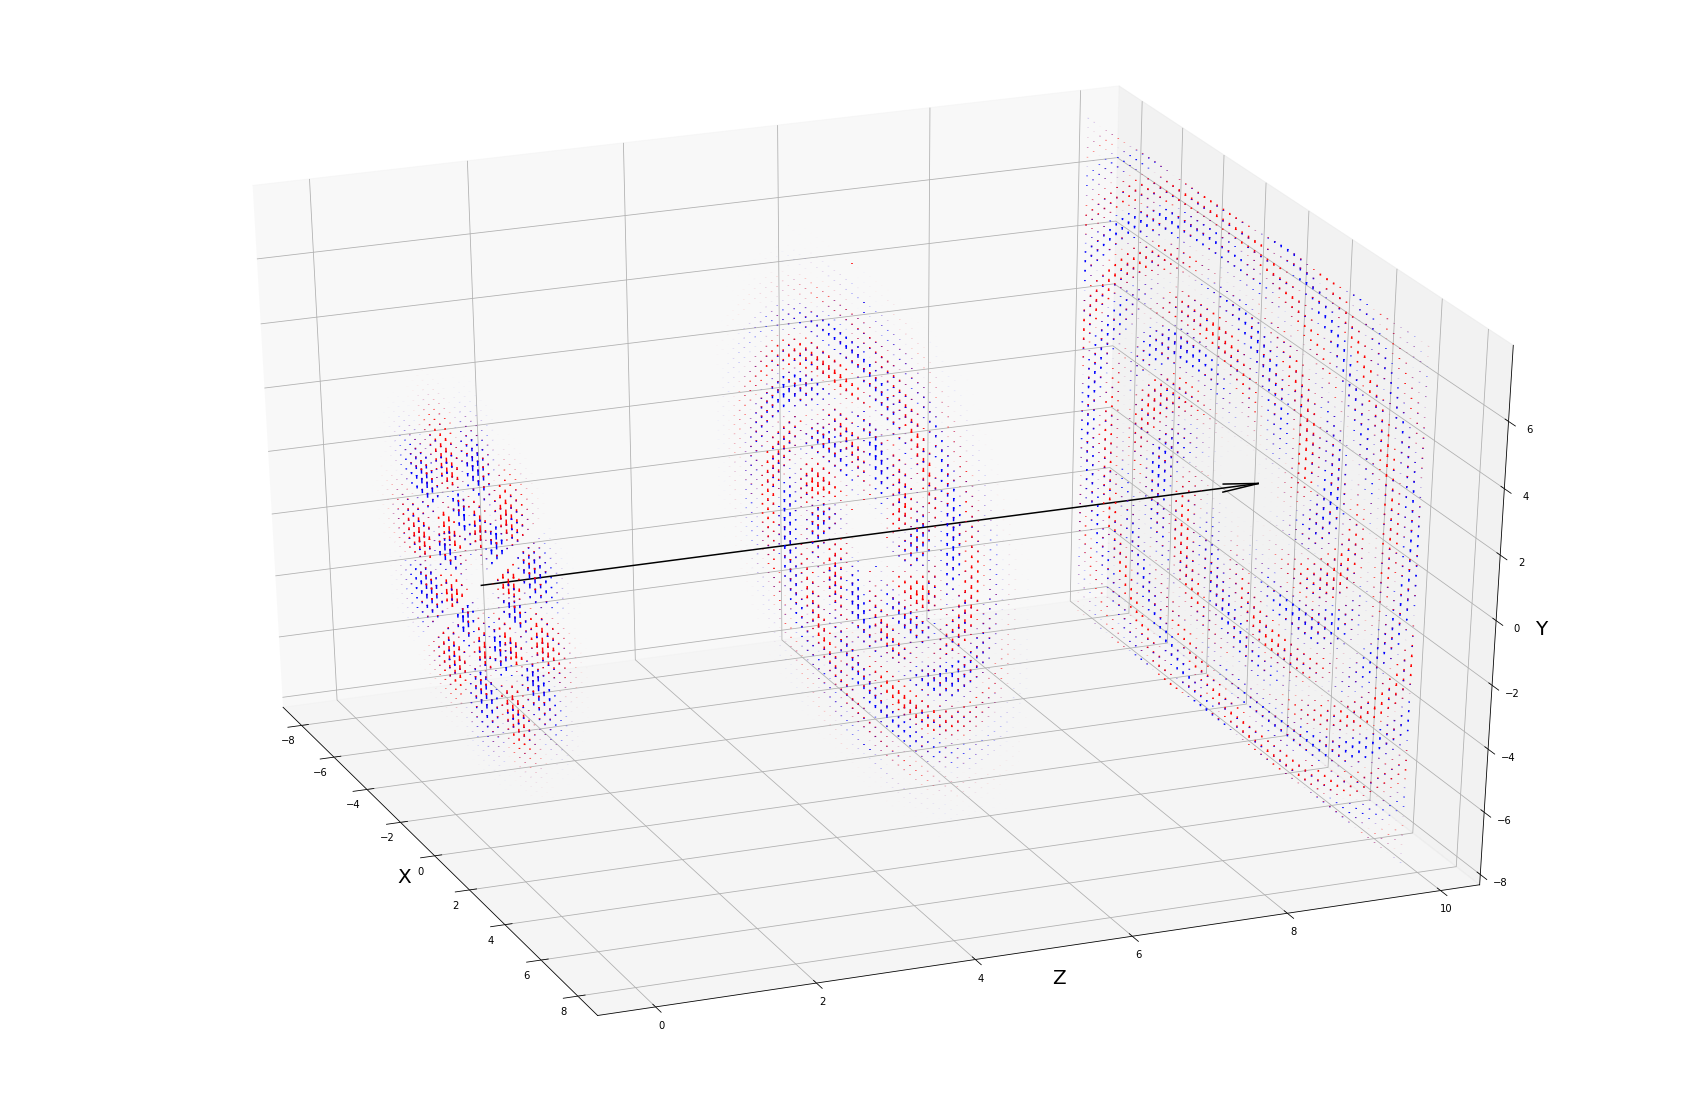

In [378]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30, 20]
ax = fig.gca(projection='3d')

X, Y, Z = np.meshgrid(np.arange(-8, 8, 0.3), np.arange(-8, 8, 0.3), np.arange(0, 10, 4.9))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
W = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        for z in range(shape[2]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y,z]**2 + Y[x,y,z]**2)
            theta = np.arctan2(Y[x,y,z],X[x,y,z])
            # Calculating E-field
            E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))
            U[x,y,z] = 0
            V[x,y,z] = E
            W[x,y,z] = 0

            C[x,y,z] = -1 if E > 0 else 1       

axis_X = 0
axis_Y = 0
axis_Z = 0
axis_U = 0
axis_V = 0
axis_W = 10
            
ax.view_init(30, -22)
q = ax.quiver(axis_X, axis_Z, axis_Y, axis_U, axis_W, axis_V, arrow_length_ratio=0.05, cmap='gist_gray')
q.set_array(np.asarray([0]))
q = ax.quiver(X, Z, Y, U, W, V, length=0.1, cmap='bwr')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Z', fontsize=20)
ax.set_zlabel('Y', fontsize=20)
q.set_array(C.flatten())


In [383]:
%%capture
fig = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(np.arange(-8, 8, 0.3), np.arange(-8, 8, 0.3))
shape = X.shape

def compute_segs(i):
    z = i/10
    Z = z*np.ones(shape)
    U = np.zeros(shape)
    V = np.zeros(shape)
    W = np.zeros(shape)
    C = np.zeros(shape)
    for x in range(shape[0]):
        for y in range(shape[1]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
            theta = np.arctan2(Y[x,y],X[x,y])

            # Calculating E-field
            E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))
            U[x,y] = 0
            V[x,y] = E
            W[x,y] = 0
            C[x,y] = -1 if E > 0 else 1

    return (X, Z, Y, U, W, V), C

segs, C = compute_segs(0)

axis_X = 0
axis_Y = 0
axis_Z = -12
axis_U = 0
axis_V = 0
axis_W = 22
            
ax.view_init(30, -22)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Z', fontsize=20)
ax.set_zlabel('Y', fontsize=20)

q = ax.quiver(*segs, length=0.1, cmap='bwr')
q.set_array(C.flatten())

q0 = q
q0.set_array(np.zeros(C.flatten().shape))


def animate(i):
    fig.clear()
    ax = fig.gca(projection='3d')
    ax.view_init(30, -22)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Z', fontsize=20)
    ax.set_zlabel('Y', fontsize=20)
    ax.set_xlim(-8, 8)
    ax.set_zlim(-8, 8)
    ax.set_ylim(0, 10)
    segs, C = compute_segs(i)
    q = ax.quiver(*segs, length=0.1, cmap='bwr')
    q.set_array(C.flatten())
    return q

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=False)

In [380]:
HTML(anim.to_html5_video())

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


### Heatmap Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


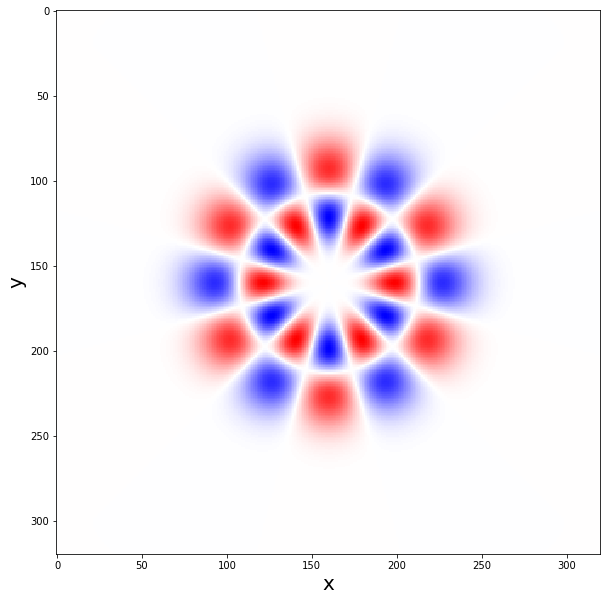

In [382]:
z = 0
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, 0.05), np.arange(-8, 8, 0.05))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating E-field
        E =  E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))

        
        U[x,y] = 0
        V[x,y] = E

        C[x,y] = -1 if E > 0 else 1


plt.imshow(V, cmap='bwr', interpolation='nearest')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

In [398]:
%%capture

fig = plt.figure()
z = 0
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, 0.1), np.arange(-8, 8, 0.1))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating E-field
        E =  E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))

        
        U[x,y] = 0
        V[x,y] = E

        C[x,y] = -1 if E > 0 else 1

        
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
im = plt.imshow(V, cmap='bwr', interpolation='nearest')


def update_heatmap(i):
    z = i/10
    U = np.zeros(shape)
    V = np.zeros(shape)
    C = np.zeros(shape)

    for x in range(shape[0]):
        for y in range(shape[1]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
            theta = np.arctan2(Y[x,y],X[x,y])

            # Calculating E-field
            E = np.exp(-6j*theta)/np.sqrt((2/k)*(1+z**2)) * (r/np.sqrt((2/k)*(1+z**2)))**6 * (7 - (2*r**2)/(2*(1+z**2)/k)) * np.exp(1j*k*z - (r**2)/((2/k)*(1+1j*z)) - 9j*np.arctan(z))
            V[x,y] = E

    im.set_array(V)
    return im,

anim = animation.FuncAnimation(fig, update_heatmap,
                               frames=100, interval=100, 
                               blit=False)

In [399]:
HTML(anim.to_html5_video())

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


# B-Field

### Vector Field Y Component Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


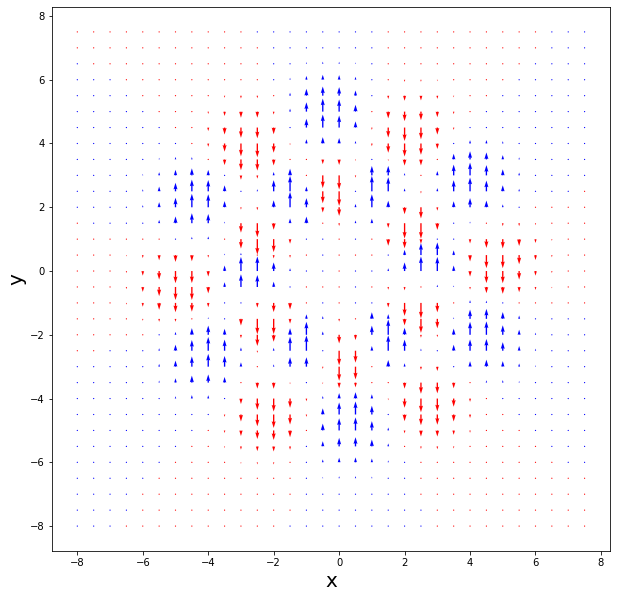

In [120]:
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, .5), np.arange(-8, 8, .5))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating B-field
        B_y = (-8j * r**6 * k * (2*(r)**2 -7*w**2) * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)))/(w**8)
        
        U[x,y] = 0
        V[x,y] = B_y
        C[x,y] = -1 if B_y > 0 else 1

        
plt.quiver(X, Y, U, V, C, units='xy', cmap='bwr', scale=50)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

### Vector Field Z Component Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


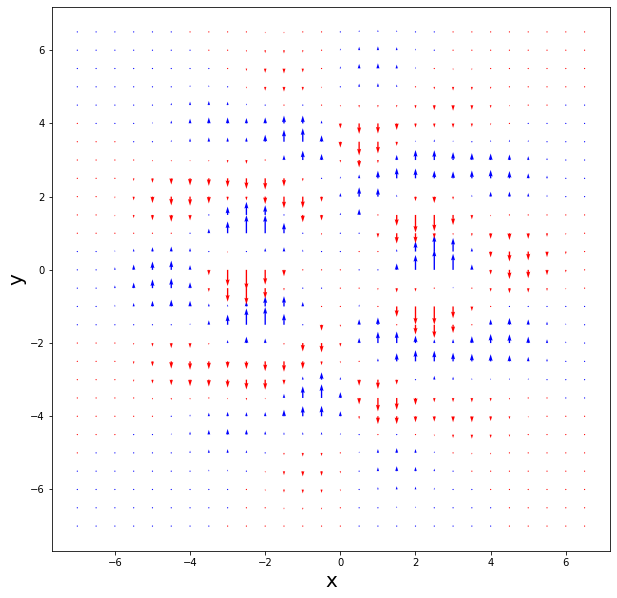

In [122]:
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-7, 7, .5), np.arange(-7, 7, .5))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating B-field
        B_y = (16 * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)) * r**5*(3j*w**2*(7*w**2-2*r**2)*np.cos(theta) + (21*w**4 + 2*r**4 - 15*(r*w)**2)*np.sin(theta)))/(w**10)
        
        U[x,y] = 0
        V[x,y] = B_y
        C[x,y] = -1 if B_y > 0 else 1

plt.quiver(X, Y, U, V, C, units='xy', cmap='bwr', scale=100)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

### 3d Cross Sections

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


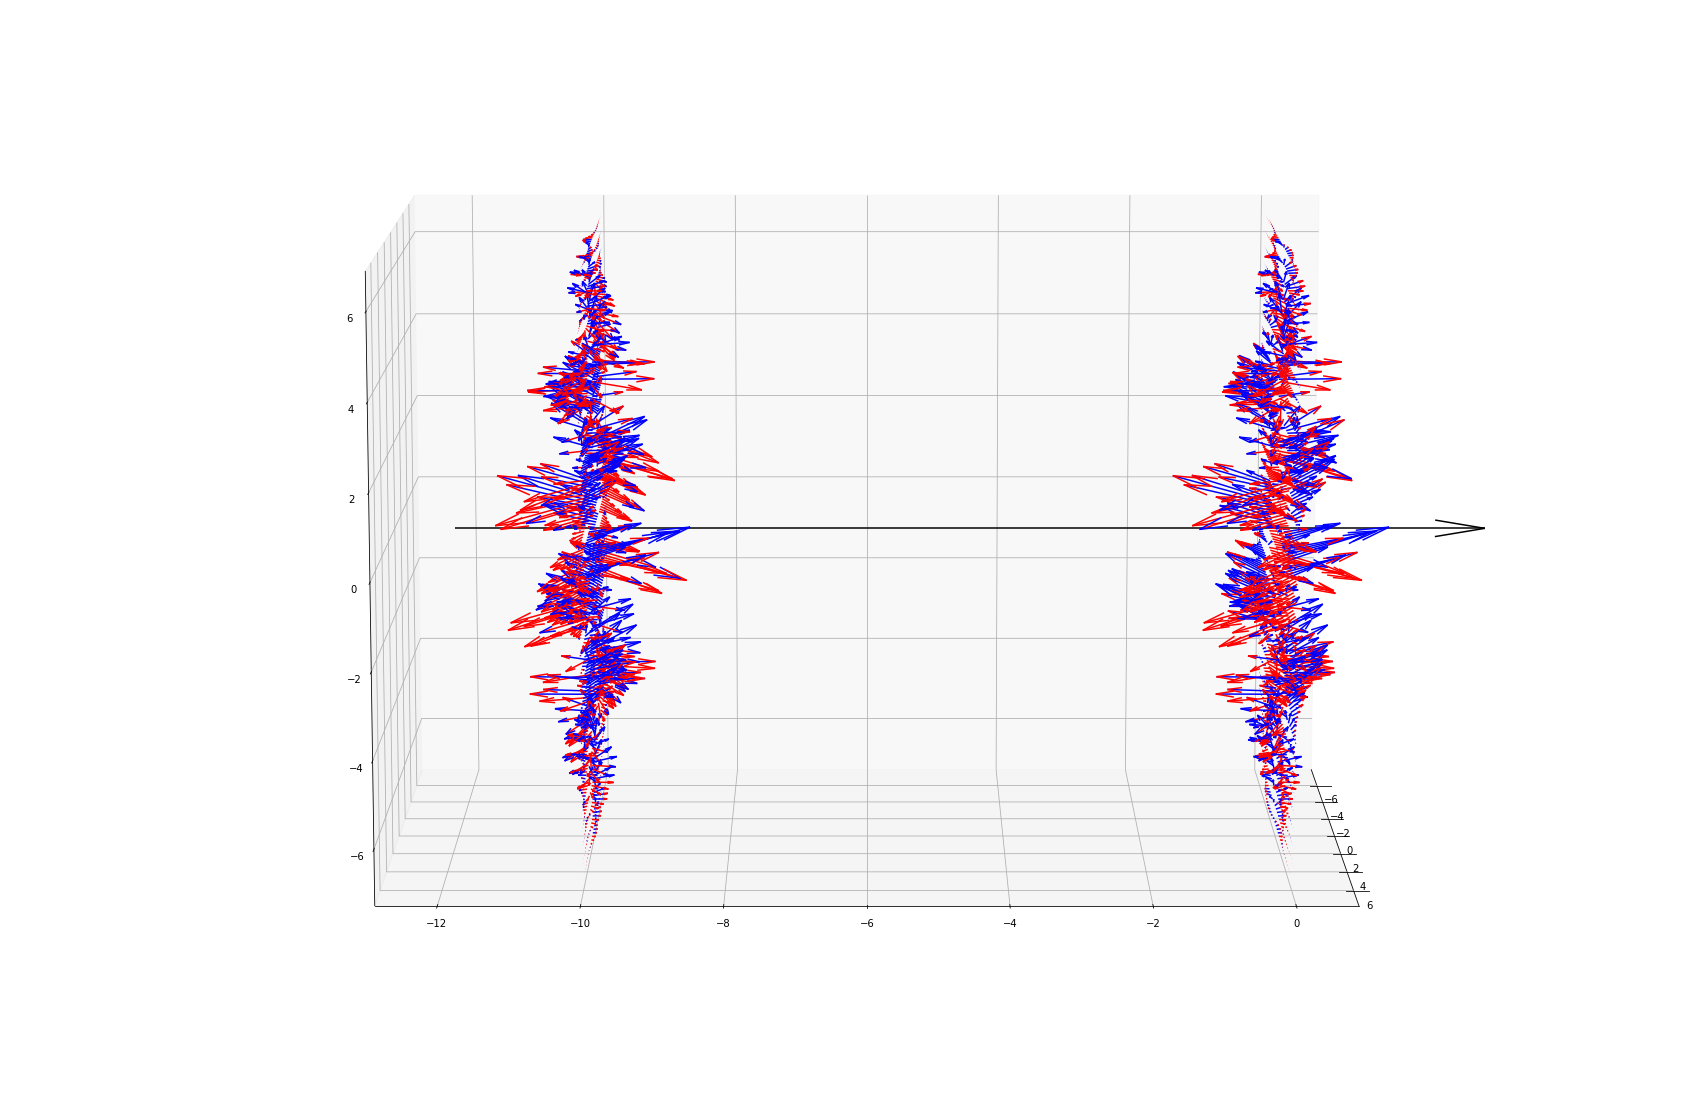

In [140]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30, 20]
ax = fig.gca(projection='3d')

X, Y, Z = np.meshgrid(np.arange(-7, 7, .4), np.arange(-7, 7, .4), np.arange(-10, 10, 10))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
W = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        for z in range(shape[2]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y,z]**2 + Y[x,y,z]**2)
            theta = np.arctan2(Y[x,y,z],X[x,y,z])

            # Calculating B-field
            B_y = (-8j * r**6 * k * (2*(r)**2 -7*w**2) * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)))/(w**8)
            B_z = (16 * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)) * r**5*(3j*w**2*(7*w**2-2*r**2)*np.cos(theta) + (21*w**4 + 2*r**4 - 15*(r*w)**2)*np.sin(theta)))/(w**10)
            U[x,y] = 0
            V[x,y] = B_y
            W[x,y] = B_z

            C[x,y] = -1 if B_y > 0 else 1       

axis_X = 0
axis_Y = 0
axis_Z = -12
axis_U = 0
axis_V = 0
axis_W = 15
            
ax.view_init(10, -0)
r = ax.quiver(axis_X, axis_Z, axis_Y, axis_U, axis_W, axis_V, arrow_length_ratio=0.05, cmap='gist_gray')
r.set_array(np.asarray([0]))
r = ax.quiver(X, Z, Y, U, W, V, length=0.025, cmap='bwr')
r.set_array(C.flatten())

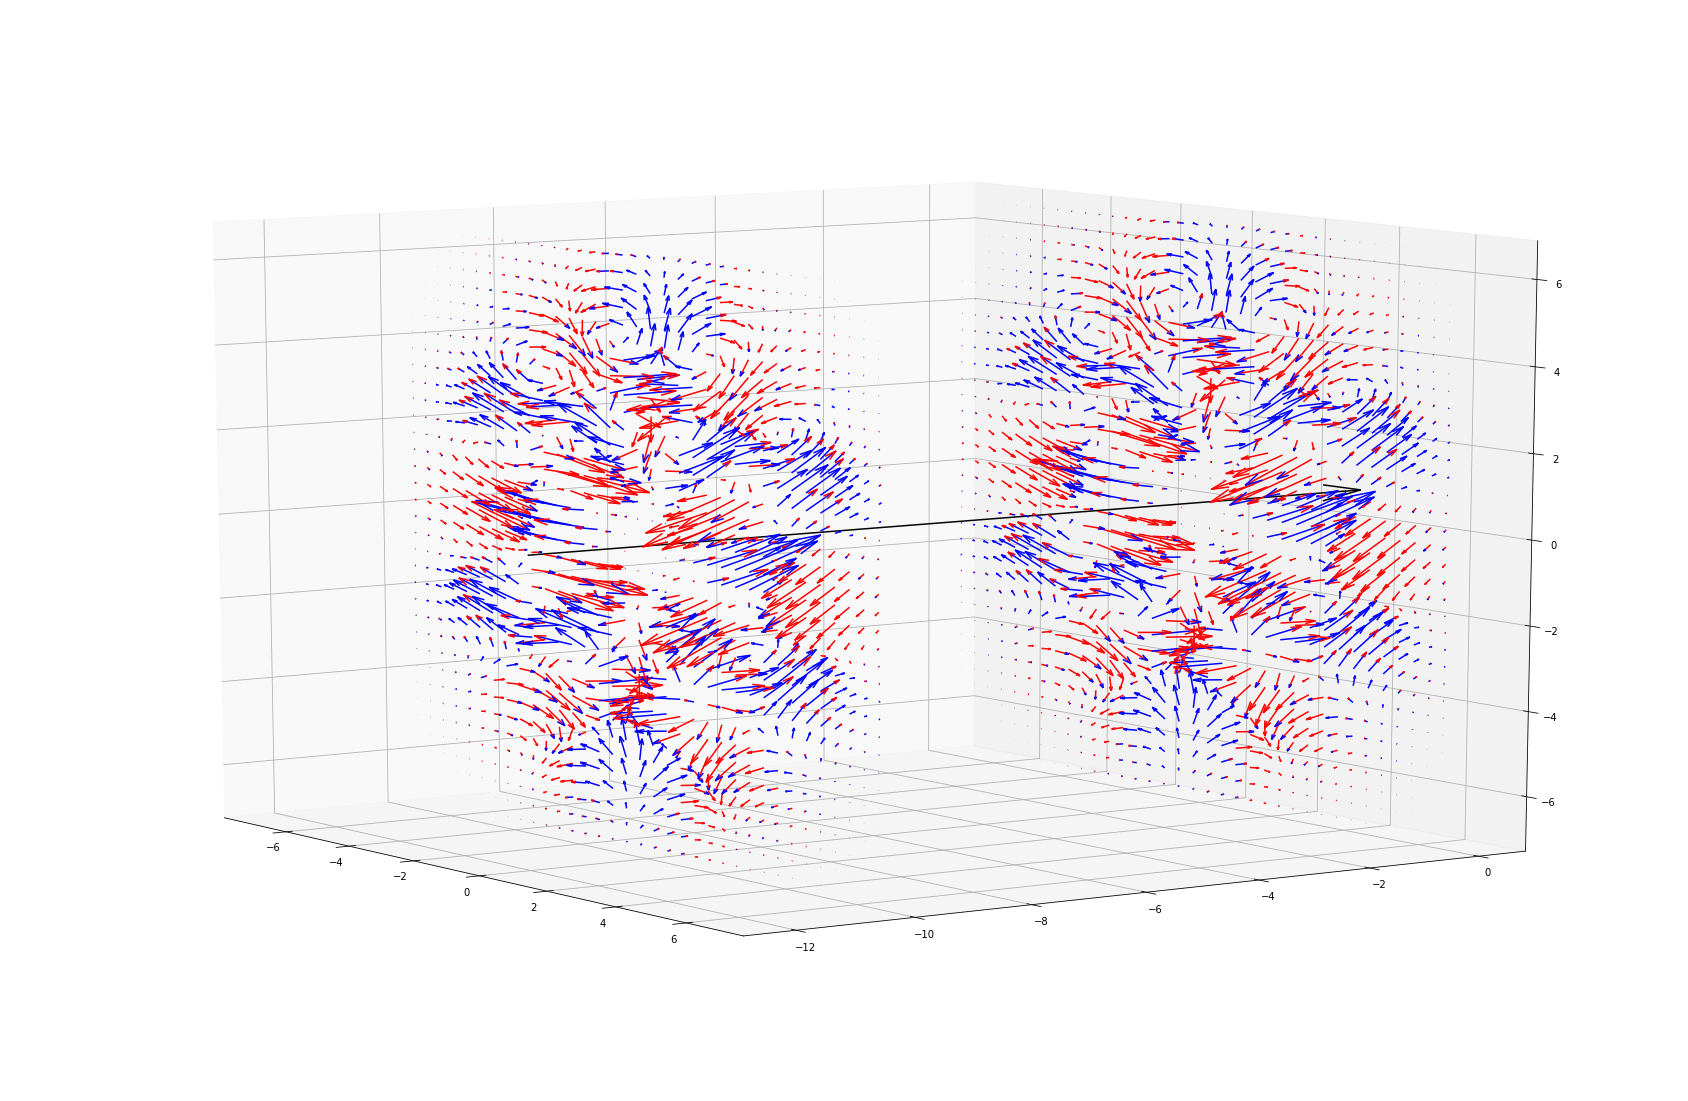

In [142]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30, 20]
ax = fig.gca(projection='3d')
ax.view_init(10, -35)
r = ax.quiver(axis_X, axis_Z, axis_Y, axis_U, axis_W, axis_V, arrow_length_ratio=0.05, cmap='gist_gray')
r.set_array(np.asarray([0]))
r = ax.quiver(X, Z, Y, U, W, V, length=0.025, cmap='bwr')
r.set_array(C.flatten())

### Heatmap Y Component Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


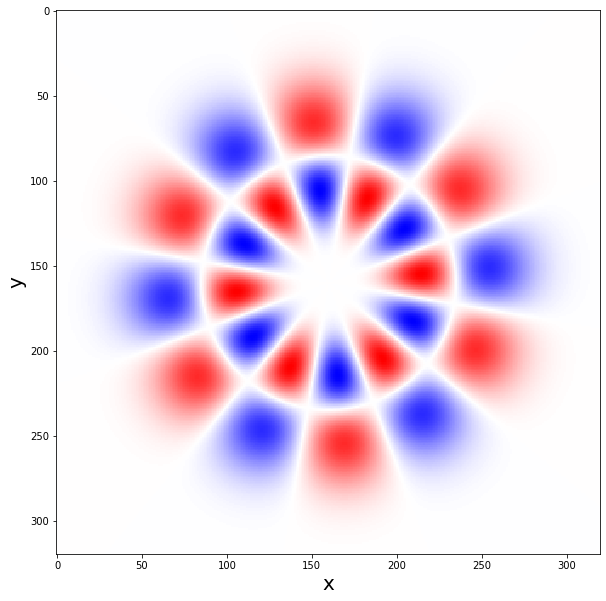

In [146]:
w = 2
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, 0.05), np.arange(-8, 8, 0.05))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        B_y = (-8j * r**6 * k * (2*(r)**2 -7*w**2) * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)))/(w**8)
        V[x,y] = B_y

plt.imshow(V, cmap='bwr', interpolation='nearest')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

### Heatmap Z Component Cross Section

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


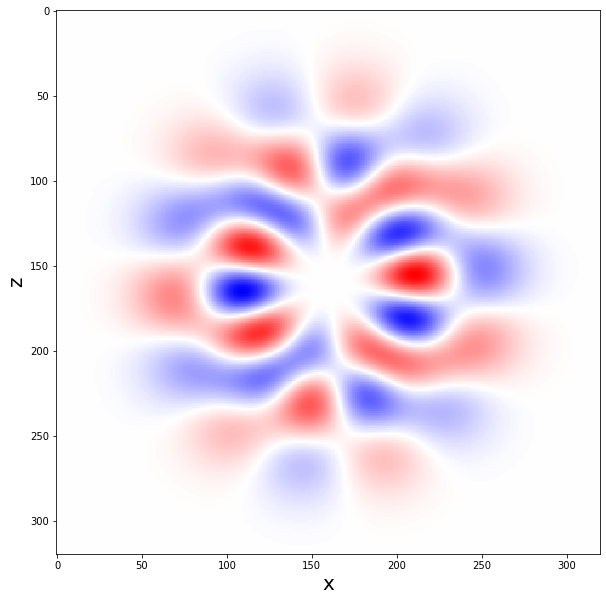

In [147]:
w = 2
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-8, 8, 0.05), np.arange(-8, 8, 0.05))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        B_z = (16 * np.exp(-1*(r/w)**2 + 1j*(6*theta - k*z)) * r**5*(3j*w**2*(7*w**2-2*r**2)*np.cos(theta) + (21*w**4 + 2*r**4 - 15*(r*w)**2)*np.sin(theta)))/(w**10)
        V[x,y] = B_z

plt.imshow(V, cmap='bwr', interpolation='nearest')
plt.xlabel('x', fontsize=20)
plt.ylabel('z', fontsize=20)
plt.show()